In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/josephgitau/September-intake/main/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


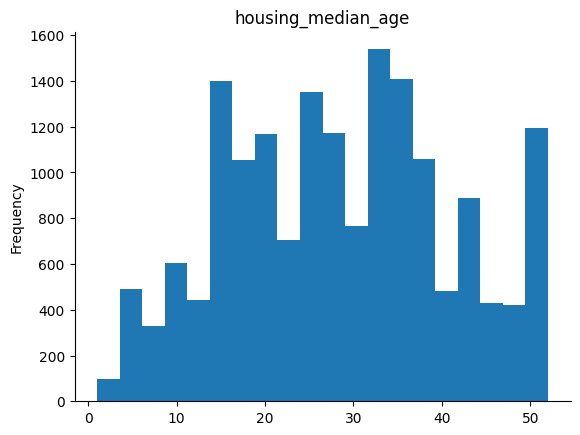

In [5]:
# @title housing_median_age

from matplotlib import pyplot as plt
df['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Multiple Linear regression

Problem statement: we are trying to predict the median_house_value given a house features (lt, lg, bedroom...)

In [10]:
# split the data into the target variable and the features

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [16]:
X.shape, y.shape, df.shape

((17000, 8), (17000,), (17000, 9))

In [15]:
# import our linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()

# fit the model to our data
lr.fit(X, y)

# make predictions
y_pred = lr.predict(X)

# evaluate the model (check the model score)
print('Model score: (R_squared score)', lr.score(X, y))

Model score: (R_squared score) 0.6413378529502687


y = **m**x + **c**

In [21]:
# get model coefficient
coeff_list = list(lr.coef_)
list(lr.coef_)

[-43139.63725758569,
 -42925.67308831368,
 1150.6949324745615,
 -8.378251213198382,
 117.64854284209014,
 -38.48877209597413,
 45.43600255225738,
 40507.06835939748]

In [18]:
lr.intercept_

-3620600.8929739078

In [33]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0


In [37]:
# prompt: convert first row to list

first_row_list = df.iloc[0].tolist()

In [46]:
first_row_list

[-114.31, 34.19, 15.0, 5612.0, 1283.0, 1015.0, 472.0, 1.4936]

In [47]:
coeff_list

[-43139.63725758569,
 -42925.67308831368,
 1150.6949324745615,
 -8.378251213198382,
 117.64854284209014,
 -38.48877209597413,
 45.43600255225738,
 40507.06835939748]

In [48]:
-114.31 * -43139.6372575856 + 34.19 * -42925.67308831368 + 15.0 * 1150.6949324745615 + 5612.0 * -8.378251213198382 + 1283.0 * 117.64854284209014 + 1015.0 * -38.48877209597413 + 472.0 * 45.43600255225738 + 1.4936 *  40507.06835939748

3627728.9774990645

In [51]:
3627728.9774990645 - 3620600.8929739078

7128.084525156766

In [50]:
lr.predict(df.head(1).drop('median_house_value', axis=1))

array([7128.08452517])